In [1]:
!pip install mysql-connector-python

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
from plotly.offline import plot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
# Connexion à BD MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="rania@123",
    database="Holding"
)

In [3]:
# Fonction pour exécuter une requête SQL et renvoyer un DataFrame
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    columns = [column[0] for column in cursor.description] #extraits colonne
    data = cursor.fetchall()  #récupére lignes
    cursor.close()
    return pd.DataFrame(data, columns=columns)

In [4]:
bon_de_livraison_df = execute_query("SELECT * FROM Bon_De_Livraison")
details_df = execute_query("SELECT * FROM Details")
meteo_df=execute_query("SELECT * FROM meteo")

In [5]:
print(bon_de_livraison_df)
print(details_df)
print(meteo_df)

        id        Code_BL     Date_BL        Code_BV  Code_client  FLG_entre  \
0        1  2031908000001  2022-08-19  2031908000197          201         10   
1        2  2041308000002  2023-08-13  2031908000197          202         10   
2        3  2042909000003  2023-09-29  2031908000197          203         10   
3        4  2010108000004  2022-08-01  2031908000197          204         10   
4        5  2012505000005  2023-05-25  2031908000197          205         10   
...    ...            ...         ...            ...          ...        ...   
1995  1996  2012610001996  2022-10-26  2022610000181          216          0   
1996  1997  2042507001997  2023-07-25  2022610000181          217          0   
1997  1998  2022907001998  2023-07-29  2022610000181          218          0   
1998  1999  2020711001999  2023-11-07  2022610000181          219          0   
1999  2000  2032512002000  2022-12-25  2022610000181          220          0   

      FLG_sortie  cachete  signe  
0   

In [8]:
meteo_df.dtypes

datetime         datetime64[ns]
temperature             float64
humidite                float64
precipitation           float64
heure                    object
minute                   object
seconde                  object
dtype: object

In [11]:
bon_de_livraison_df.dtypes

id                      int64
Code_BL                 int64
Date_BL        datetime64[ns]
Code_BV                 int64
Code_client             int64
FLG_entre               int64
FLG_sortie              int64
cachete                 int64
signe                   int64
dtype: object

In [6]:
details_df.dtypes

id               int64
Code_BL          int64
Code_produit     int64
Quantite        object
Prix            object
dtype: object

In [9]:
meteo_df['datetime'] = pd.to_datetime(meteo_df['datetime'], errors='coerce')
print(meteo_df)

       datetime  temperature  humidite  precipitation heure minute seconde
0    2022-01-01         12.6      79.0          2.747    00     00      00
1    2022-01-01         10.8      74.5          0.000    08     45      08
2    2022-01-01         11.0      71.4          0.000    17     30      17
3    2022-01-02         13.0      59.8          0.000    02     15      25
4    2022-01-02         13.5      72.0          1.202    11     00      34
...         ...          ...       ...            ...   ...    ...     ...
1995 2023-12-29         13.8      71.1          0.107    12     59      25
1996 2023-12-29         13.6      68.9          1.028    21     44      34
1997 2023-12-30         13.9      66.5          0.000    06     29      42
1998 2023-12-30         14.0      66.4          0.000    15     14      51
1999 2023-12-31         13.9      68.1          0.000    00     00      00

[2000 rows x 7 columns]


In [10]:
bon_de_livraison_df['Date_BL'] = pd.to_datetime(bon_de_livraison_df['Date_BL'], errors='coerce')
print(bon_de_livraison_df)

        id        Code_BL    Date_BL        Code_BV  Code_client  FLG_entre  \
0        1  2031908000001 2022-08-19  2031908000197          201         10   
1        2  2041308000002 2023-08-13  2031908000197          202         10   
2        3  2042909000003 2023-09-29  2031908000197          203         10   
3        4  2010108000004 2022-08-01  2031908000197          204         10   
4        5  2012505000005 2023-05-25  2031908000197          205         10   
...    ...            ...        ...            ...          ...        ...   
1995  1996  2012610001996 2022-10-26  2022610000181          216          0   
1996  1997  2042507001997 2023-07-25  2022610000181          217          0   
1997  1998  2022907001998 2023-07-29  2022610000181          218          0   
1998  1999  2020711001999 2023-11-07  2022610000181          219          0   
1999  2000  2032512002000 2022-12-25  2022610000181          220          0   

      FLG_sortie  cachete  signe  
0              2

In [12]:
details_df['Quantite'] = pd.to_numeric(details_df['Quantite'], errors='coerce')
details_df['Prix'] = pd.to_numeric(details_df['Prix'], errors='coerce')
print(details_df)

        id        Code_BL  Code_produit  Quantite     Prix
0        1  2022705001434           302       401  2081.27
1        2  2042201000585           303       589  1722.20
2        3  2022708000518           304       881  2009.94
3        4  2041403000331           305       791  1649.17
4        5  2030311001776           306        89  1257.14
...    ...            ...           ...       ...      ...
1995  1996  2011511001982           307       182  1884.14
1996  1997  2022002001185           308       877  1923.78
1997  1998  2041201000333           309       390  1361.81
1998  1999  2030512001609           310       195  1502.80
1999  2000  2040212000271           311       142  1628.70

[2000 rows x 5 columns]


In [13]:
print(details_df.isnull().sum())
print(meteo_df.isnull().sum())
print(bon_de_livraison_df.isnull().sum())

id              0
Code_BL         0
Code_produit    0
Quantite        0
Prix            0
dtype: int64
datetime         0
temperature      0
humidite         0
precipitation    0
heure            0
minute           0
seconde          0
dtype: int64
id             0
Code_BL        0
Date_BL        0
Code_BV        0
Code_client    0
FLG_entre      0
FLG_sortie     0
cachete        0
signe          0
dtype: int64


In [29]:
print("Colonnes de meteo_df:", meteo_df.columns)
print("Colonnes de details_df:", details_df.columns)

Colonnes de meteo_df: Index(['datetime', 'temperature', 'humidite', 'precipitation', 'heure',
       'minute', 'seconde', 'date', 'id'],
      dtype='object')
Colonnes de details_df: Index(['id', 'Code_BL', 'Code_produit', 'Quantite', 'Prix'], dtype='object')


In [24]:
meteo_df['id'] = meteo_df.index+1
print(meteo_df)

       datetime  temperature  humidite  precipitation  heure minute seconde  \
0    2022-01-01         12.6      79.0          2.747      0     00      00   
1    2022-01-01         10.8      74.5          0.000      0     45      08   
2    2022-01-01         11.0      71.4          0.000      0     30      17   
3    2022-01-02         13.0      59.8          0.000      0     15      25   
4    2022-01-02         13.5      72.0          1.202      0     00      34   
...         ...          ...       ...            ...    ...    ...     ...   
1995 2023-12-29         13.8      71.1          0.107      0     59      25   
1996 2023-12-29         13.6      68.9          1.028      0     44      34   
1997 2023-12-30         13.9      66.5          0.000      0     29      42   
1998 2023-12-30         14.0      66.4          0.000      0     14      51   
1999 2023-12-31         13.9      68.1          0.000      0     00      00   

            date    id  
0     2022-01-01     1  
1

In [28]:
menara_df = pd.merge(details_df, meteo_df, on='id')
print(menara_df)

        id        Code_BL  Code_produit  Quantite     Prix   datetime  \
0        1  2022705001434           302       401  2081.27 2022-01-01   
1        2  2042201000585           303       589  1722.20 2022-01-01   
2        3  2022708000518           304       881  2009.94 2022-01-01   
3        4  2041403000331           305       791  1649.17 2022-01-02   
4        5  2030311001776           306        89  1257.14 2022-01-02   
...    ...            ...           ...       ...      ...        ...   
1995  1996  2011511001982           307       182  1884.14 2023-12-29   
1996  1997  2022002001185           308       877  1923.78 2023-12-29   
1997  1998  2041201000333           309       390  1361.81 2023-12-30   
1998  1999  2030512001609           310       195  1502.80 2023-12-30   
1999  2000  2040212000271           311       142  1628.70 2023-12-31   

      temperature  humidite  precipitation  heure minute seconde        date  
0            12.6      79.0          2.747  

In [32]:
menara_df['minute'] = pd.to_numeric(menara_df['minute'], errors='coerce')
menara_df['seconde'] = pd.to_numeric(menara_df['seconde'], errors='coerce')
menara_df.drop('date', axis=1, inplace=True)

,id,Code_BL,Code_produit,Quantite,Prix,datetime,temperature,humidite,precipitation,heure,minute,seconde
0,1,2022705001434,302,401,2081.27,2022-01-01,12.6,79.0,2.747,0,0,0
1,2,2042201000585,303,589,1722.20,2022-01-01,10.8,74.5,0.000,0,45,8
2,3,2022708000518,304,881,2009.94,2022-01-01,11.0,71.4,0.000,0,30,17
3,4,2041403000331,305,791,1649.17,2022-01-02,13.0,59.8,0.000,0,15,25
4,5,2030311001776,306,89,1257.14,2022-01-02,13.5,72.0,1.202,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2011511001982,307,182,1884.14,2023-12-29,13.8,71.1,0.107,0,59,25
1996,1997,2022002001185,308,877,1923.78,2023-12-29,13.6,68.9,1.028,0,44,34
1997,1998,2041201000333,309,390,1361.81,2023-12-30,13.9,66.5,0.000,0,29,42
1998,1999,2030512001609,310,195,1502.80,2023-12-30,14.0,66.4,0.000,0,14,51


In [33]:
print(menara_df)

        id        Code_BL  Code_produit  Quantite     Prix   datetime  \
0        1  2022705001434           302       401  2081.27 2022-01-01   
1        2  2042201000585           303       589  1722.20 2022-01-01   
2        3  2022708000518           304       881  2009.94 2022-01-01   
3        4  2041403000331           305       791  1649.17 2022-01-02   
4        5  2030311001776           306        89  1257.14 2022-01-02   
...    ...            ...           ...       ...      ...        ...   
1995  1996  2011511001982           307       182  1884.14 2023-12-29   
1996  1997  2022002001185           308       877  1923.78 2023-12-29   
1997  1998  2041201000333           309       390  1361.81 2023-12-30   
1998  1999  2030512001609           310       195  1502.80 2023-12-30   
1999  2000  2040212000271           311       142  1628.70 2023-12-31   

      temperature  humidite  precipitation  heure  minute  seconde  
0            12.6      79.0          2.747      0     

In [34]:
menara_df['jour'] = menara_df['datetime'].dt.dayofweek #0:lundi, 1:mardi ....
menara_df['mois'] = menara_df['datetime'].dt.month
menara_df['annee'] = menara_df['datetime'].dt.year

In [41]:
menara_df = menara_df.drop(columns=['datetime'])

In [42]:
menara_df

,id,Code_BL,Code_produit,Quantite,Prix,temperature,humidite,precipitation,heure,minute,seconde,jour,mois,annee
0,1,2022705001434,302,401,2081.27,12.6,79.0,2.747,0,0,0,5,1,2022
1,2,2042201000585,303,589,1722.20,10.8,74.5,0.000,0,45,8,5,1,2022
2,3,2022708000518,304,881,2009.94,11.0,71.4,0.000,0,30,17,5,1,2022
3,4,2041403000331,305,791,1649.17,13.0,59.8,0.000,0,15,25,6,1,2022
4,5,2030311001776,306,89,1257.14,13.5,72.0,1.202,0,0,34,6,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2011511001982,307,182,1884.14,13.8,71.1,0.107,0,59,25,4,12,2023
1996,1997,2022002001185,308,877,1923.78,13.6,68.9,1.028,0,44,34,4,12,2023
1997,1998,2041201000333,309,390,1361.81,13.9,66.5,0.000,0,29,42,5,12,2023
1998,1999,2030512001609,310,195,1502.80,14.0,66.4,0.000,0,14,51,5,12,2023


In [55]:
#split data
x = menara_df.drop(columns=['Prix'])  # Features
y = menara_df['Prix']  # Target 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
print("Ensemble d'entraînement :", x_train.shape[0])
print("Ensemble de test :", x_test.shape[0])

Ensemble d'entraînement : 1600
Ensemble de test : 400


In [56]:
model_RL = LinearRegression()
model_RL.fit(x_train, y_train)

LinearRegression()

In [70]:
#-->Pour l'évaluation des performances: les métriques d'évaluation
#Mean Absolute Error (MAE) : l'erreur absolue moyenne :Indique en moyenne de combien les prédictions du modèle s'écartent des valeurs réelles. 
#Plus cette valeur est faible, meilleure est la performance.

#Mean Squared Error (MSE) : l'erreur quadratique moyenne : Donne une idée de la variance des erreurs. Étant donné que cette métrique pénalise
#fortement les grandes erreurs (car elle élève les écarts au carré), elle peut être utile pour identifier des modèles qui font de grosses erreurs.

#Root Mean Squared Error (RMSE) : la racine carrée de l'erreur quadratique moyenne : Comme le MSE, mais ramène l'erreur à la même unité que 
#les données d'origine, ce qui peut être plus interprétable.

#R² Score (coefficient de détermination) : proportion de la variance expliquée par le modèle : Mesure la proportion de la variance expliquée par le modèle. 
#Un score de 1 signifie que le modèle explique parfaitement la variance, tandis qu'un score de 0 indique qu'il n'explique rien de plus que la moyenne des données.

In [57]:
y_pred_RL = model_RL.predict(x_test)
# Calcul des métriques d'évaluation
mae_RL = mean_absolute_error(y_test, y_pred_RL)
mse_RL = mean_squared_error(y_test, y_pred_RL)
rmse_RL = np.sqrt(mse_RL)
r2_RL = r2_score(y_test, y_pred_RL)

print("Métriques du modèle de régression linéaire :")
print("Mean Absolute Error (MAE) :", mae_RL)
print("Mean Squared Error (MSE) :", mse_RL)
print("Root Mean Squared Error (RMSE) :", rmse_RL)
print("R² Score :", r2_RL) #0.35  -0.0066471010362954

Métriques du modèle de régression linéaire :
Mean Absolute Error (MAE) : 244.43702266520447
Mean Squared Error (MSE) : 80145.86085408277
Root Mean Squared Error (RMSE) : 283.1004430481923
R² Score : -0.0040408630080961405


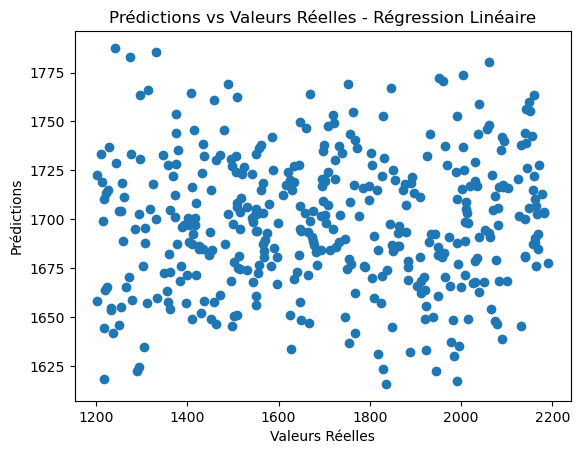

In [58]:
# Visualisation des prédictions
plt.scatter(y_test, y_pred_RL)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles - Régression Linéaire')
plt.show()

In [59]:
# Créer les caractéristiques polynomiales
polynomial_features = PolynomialFeatures(degree=2)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.transform(x_test)
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

LinearRegression()

In [60]:
y_pred_poly = model_poly.predict(x_test_poly)
# Calcul des métriques
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Métriques du modèle de régression polynomiale :")
print("Mean Absolute Error (MAE) :", mae_poly)
print("Mean Squared Error (MSE) :", mse_poly)
print("Root Mean Squared Error (RMSE) :", rmse_poly)
print("R² Score :", r2_poly) #0.35  -0.017779486703925595

Métriques du modèle de régression polynomiale :
Mean Absolute Error (MAE) : 245.7553580941809
Mean Squared Error (MSE) : 81046.94585262168
Root Mean Squared Error (RMSE) : 284.68745292446886
R² Score : -0.015329358133550519


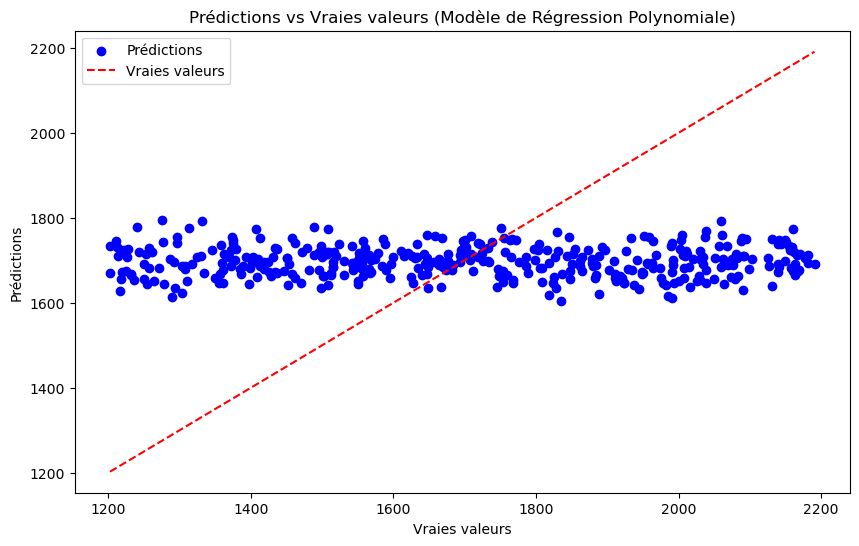

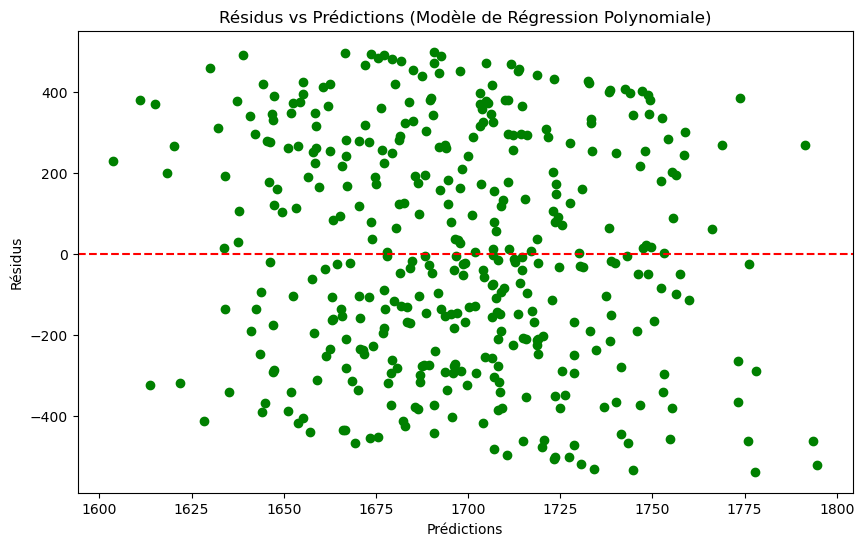

In [61]:
# Tracer les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Vraies valeurs')
plt.title('Prédictions vs Vraies valeurs (Modèle de Régression Polynomiale)')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.legend()
plt.show()

# Tracer les résidus
residuals = y_test - y_pred_poly
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals, color='green')
plt.title('Résidus vs Prédictions (Modèle de Régression Polynomiale)')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [62]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
y_pred_random_forest = random_forest_model.predict(x_test)
# Calcul des métriques
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Métriques du modèle de Forêts d'arbres de décision :")
print("Mean Absolute Error (MAE) :", mae_random_forest)
print("Mean Squared Error (MSE) :", mse_random_forest)
print("Root Mean Squared Error (RMSE) :", rmse_random_forest)
print("R² Score :", r2_random_forest)  #0.35 -0.07589667975731684

Métriques du modèle de Forêts d'arbres de décision :
Mean Absolute Error (MAE) : 254.04338275
Mean Squared Error (MSE) : 87498.48574185748
Root Mean Squared Error (RMSE) : 295.80142958048305
R² Score : -0.09615211814997737


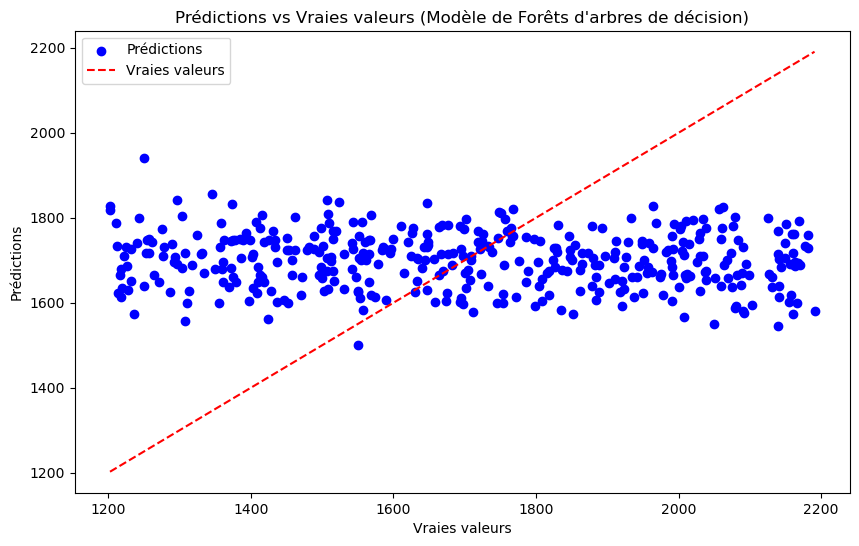

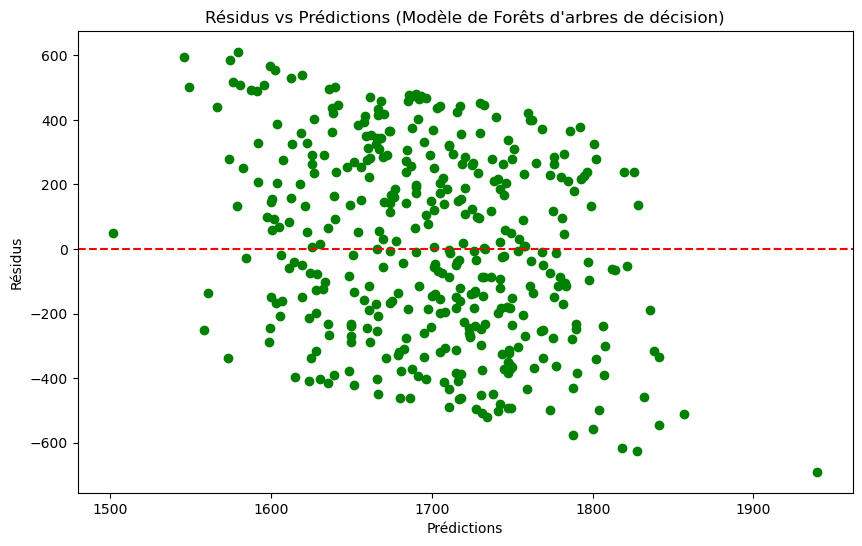

In [64]:
# Tracer les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Vraies valeurs')
plt.title('Prédictions vs Vraies valeurs (Modèle de Forêts d\'arbres de décision)')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.legend()
plt.show()

# Tracer les résidus
residuals = y_test - y_pred_random_forest
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_random_forest, residuals, color='green')
plt.title('Résidus vs Prédictions (Modèle de Forêts d\'arbres de décision)')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [65]:
#Comparaison des métriques
models = ['Random Forest', 'Polynomial Regression', 'Linear Regression']
mae = [mae_random_forest, mae_poly, mae_RL]
mse = [mse_random_forest, mse_poly, mse_RL]
rmse = [rmse_random_forest, rmse_poly, rmse_RL]
r2 = [r2_random_forest, r2_poly, r2_RL]

print("Comparaison des métriques des différents modèles :")
for model, mae_score, mse_score, rmse_score, r2_score in zip(models, mae, mse, rmse, r2):
    print(f"\nModèle : {model}")
    print(f"Mean Absolute Error (MAE) : {mae_score}")
    print(f"Mean Squared Error (MSE) : {mse_score}")
    print(f"Root Mean Squared Error (RMSE) : {rmse_score}")
    print(f"R² Score : {r2_score}")

Comparaison des métriques des différents modèles :

Modèle : Random Forest
Mean Absolute Error (MAE) : 254.04338275
Mean Squared Error (MSE) : 87498.48574185748
Root Mean Squared Error (RMSE) : 295.80142958048305
R² Score : -0.09615211814997737

Modèle : Polynomial Regression
Mean Absolute Error (MAE) : 245.7553580941809
Mean Squared Error (MSE) : 81046.94585262168
Root Mean Squared Error (RMSE) : 284.68745292446886
R² Score : -0.015329358133550519

Modèle : Linear Regression
Mean Absolute Error (MAE) : 244.43702266520447
Mean Squared Error (MSE) : 80145.86085408277
Root Mean Squared Error (RMSE) : 283.1004430481923
R² Score : -0.0040408630080961405


In [66]:
# Prédictions sur l'ensemble de test avec le modèle de régression polynomiale
y_pred_RL = model_RL.predict(x_test)
# Calcul du chiffre d'affaires prédit pour chaque article dans l'ensemble de test
prix_pred = y_pred_RL  # Prix prédit pour chaque article
x_test['chiffre_affaires_pred'] = x_test['Quantite'] * prix_pred  # Calcul du chiffre d'affaires prédit pour chaque article
chiffre_affaires_total_pred = x_test['chiffre_affaires_pred'].sum()  # Calcul du chiffre d'affaires total prédit
print("Chiffre d'affaires total prédit :", chiffre_affaires_total_pred)

Chiffre d'affaires total prédit : 333436426.82257664


In [67]:
# Regrouper les données prédites par année et mois, puis calculer le chiffre d'affaires total pour chaque mois
chiffre_affaires_pred_par_mois = x_test.groupby(['annee', 'mois'])['chiffre_affaires_pred'].sum()

print("Chiffre d'affaires total prédit par mois sur l'ensemble de test :")
print(chiffre_affaires_pred_par_mois) 

Chiffre d'affaires total prédit par mois sur l'ensemble de test :
annee  mois
2022   1       1.641387e+07
       2       1.484466e+07
       3       1.475713e+07
       4       1.147767e+07
       5       1.829218e+07
       6       1.612129e+07
       7       1.487534e+07
       8       1.261900e+07
       9       7.398496e+06
       10      6.664843e+06
       11      1.469276e+07
       12      9.520817e+06
2023   1       5.354008e+06
       2       1.270011e+07
       3       1.419609e+07
       4       1.436235e+07
       5       2.087252e+07
       6       1.954084e+07
       7       1.436075e+07
       8       1.321942e+07
       9       2.084027e+07
       10      1.123820e+07
       11      1.452244e+07
       12      1.455138e+07
Name: chiffre_affaires_pred, dtype: float64


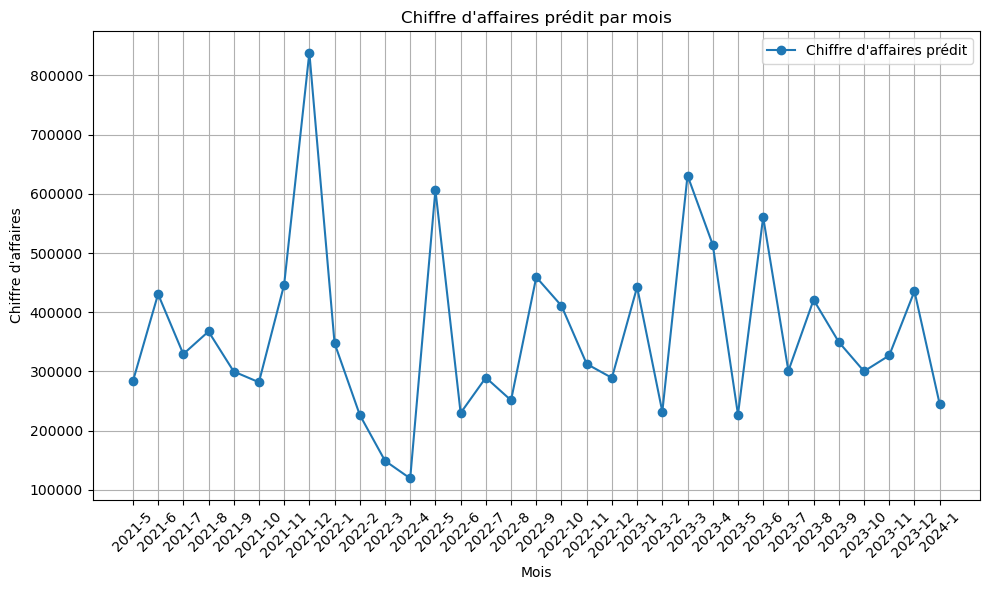

In [38]:
# Vérifier si le répertoire existe, sinon le créer
if not os.path.exists(directory):
    os.makedirs(directory)
    
# Conversion des index en chaînes de caractères
index_str = [f'{index[0]}-{index[1]}' for index in chiffre_affaires_pred_par_mois.index]

# Tracé du chiffre d'affaires réel par rapport au chiffre d'affaires prédit
plt.figure(figsize=(10, 6))
plt.plot(index_str, chiffre_affaires_pred_par_mois.values, label='Chiffre d\'affaires prédit', marker='o')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires prédit par mois')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


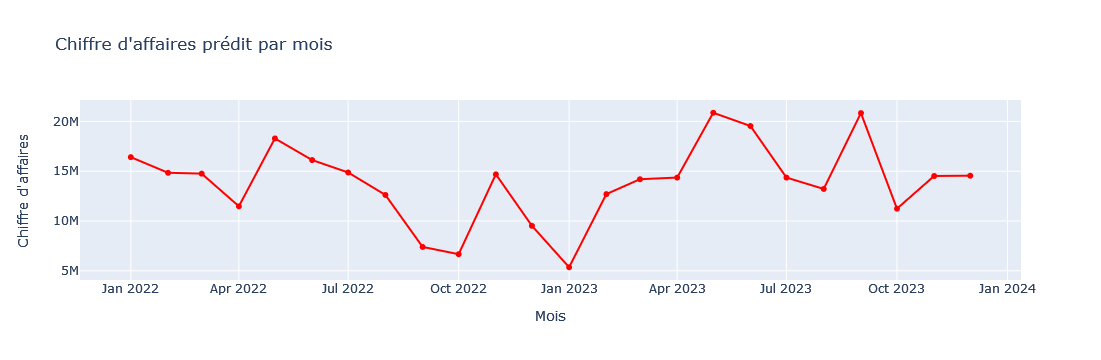

In [104]:
#fig1
# Conversion des index en chaînes de caractères
index_str = [f'{index[0]}-{index[1]}' for index in chiffre_affaires_pred_par_mois.index]

# Créer une trace pour le graphique Plotly
trace = go.Scatter(x=index_str, y=chiffre_affaires_pred_par_mois.values, mode='markers+lines', name='Chiffre d\'affaires prédit', line=dict(color='red'))

# Créer une figure Plotly
fig1 = go.Figure(trace)

# Ajouter des titres et des étiquettes d'axe
fig1.update_layout(
    title='Chiffre d\'affaires prédit par mois',
    xaxis_title='Mois',
    yaxis_title='Chiffre d\'affaires'
)

# Afficher le graphique
fig1.show()


In [105]:

html_code1 = plot(fig1, output_type='div', include_plotlyjs='cdn')

# Afficher le code HTML/JavaScript
print(html_code1)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="261477fe-c959-4513-a80c-08cbb2a25d87" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("261477fe-c959-4513-a80c-08cbb2a25d87")) {                    Plotly.newPlot(                        "261477fe-c959-4513-a80c-08cbb2a25d87",                        [{"line":{"color":"red"},"mode":"markers+lines","name":"Chiffre d'affaires pr\u00e9dit","x":["2022-1","2022-2","2022-3","2022-4","2022-5","2022-6","2022-7","2022-8","2022-9","2022-10","2022-11","2022-12","2023-1","2023-2","2023-3","2023-4","2023-5","2023-6","2023-7","2023-8","2023-9","2023-10","2023-11","2023-12"],"y":[16413872.5548828

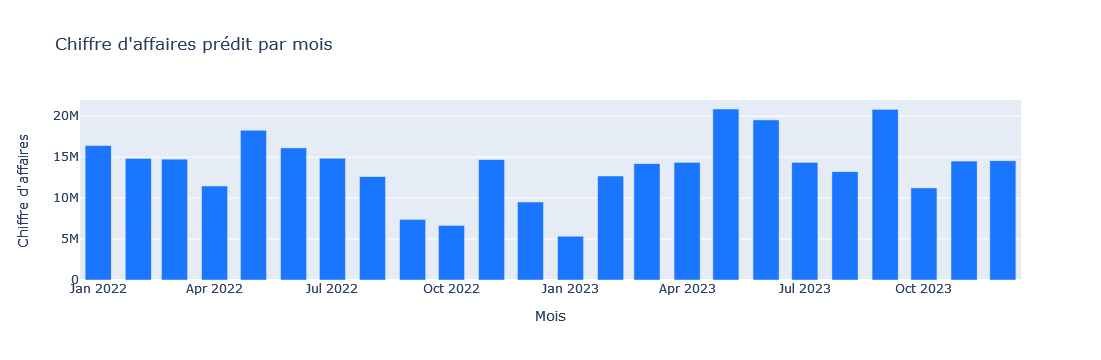

In [76]:
# Initialiser le mode notebook pour Plotly
init_notebook_mode(connected=True)

# Conversion des index en chaînes de caractères
index_str = [f'{index[0]}-{index[1]}' for index in chiffre_affaires_pred_par_mois.index]

# Créer un graphique en barres avec Plotly
data = [
    go.Bar(
        x=index_str,
        y=chiffre_affaires_pred_par_mois.values,
        name='Chiffre d\'affaires prédit',
        marker=dict(color='rgb(26, 118, 255)')
    )
]

# Personnaliser le layout
layout = go.Layout(
    title='Chiffre d\'affaires prédit par mois',
    xaxis=dict(title='Mois'),
    yaxis=dict(title='Chiffre d\'affaires'),
    bargap=0.2,
    bargroupgap=0.1
)

# Créer la figure
fig2 = go.Figure(data=data, layout=layout)

# Afficher le graphique dans Jupyter Notebook
iplot(fig2)


In [78]:
# Calcul du chiffre d'affaires réel
menara_df['chiffre_affaires_reel'] = menara_df['Quantite'] * menara_df['Prix']

# Regrouper les données par année et mois, puis calculer le chiffre d'affaires total pour chaque mois
chiffre_affaires_reel_par_mois = menara_df.groupby(['annee', 'mois'])['chiffre_affaires_reel'].sum()

print("Chiffre d'affaires total réel par mois :")
print(chiffre_affaires_reel_par_mois)

Chiffre d'affaires total réel par mois :
annee  mois
2022   1       77116823.63
       2       68630087.10
       3       83966565.11
       4       73768382.25
       5       74456862.95
       6       75452831.26
       7       66568257.54
       8       71458412.47
       9       57698419.10
       10      72078822.15
       11      73348094.49
       12      69397222.08
2023   1       69682738.80
       2       69335513.73
       3       81240438.54
       4       67863083.18
       5       76879289.95
       6       72152337.29
       7       70781407.65
       8       63719498.96
       9       73383567.30
       10      63710243.02
       11      67930953.60
       12      73779405.95
Name: chiffre_affaires_reel, dtype: float64


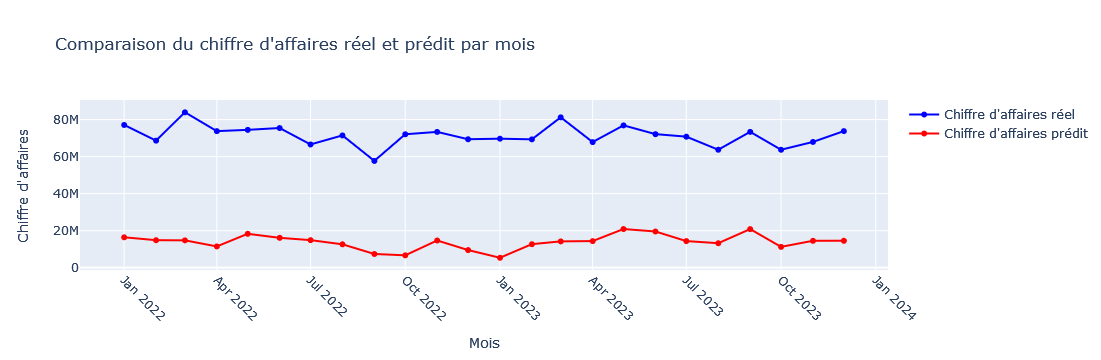

In [79]:
# Comparer le chiffre d'affaires réel et prédit par mois
chiffre_affaires_comparaison = pd.DataFrame({
    'Chiffre d\'affaires réel': chiffre_affaires_reel_par_mois,
    'Chiffre d\'affaires prédit': chiffre_affaires_pred_par_mois
}).reset_index()

# Conversion des index en chaînes de caractères pour l'axe des abscisses
index_str = [f'{index[0]}-{index[1]:02d}' for index in chiffre_affaires_comparaison[['annee', 'mois']].values]
chiffre_affaires_comparaison['annee_mois'] = index_str

# Créer une trace pour le chiffre d'affaires réel
trace_reel = go.Scatter(x=chiffre_affaires_comparaison['annee_mois'], 
                        y=chiffre_affaires_comparaison['Chiffre d\'affaires réel'], 
                        mode='lines+markers', 
                        name='Chiffre d\'affaires réel', 
                        line=dict(color='blue'))

# Créer une trace pour le chiffre d'affaires prédit
trace_prevu = go.Scatter(x=chiffre_affaires_comparaison['annee_mois'], 
                         y=chiffre_affaires_comparaison['Chiffre d\'affaires prédit'], 
                         mode='lines+markers', 
                         name='Chiffre d\'affaires prédit', 
                         line=dict(color='red'))

# Créer la figure
fig_comparaison = go.Figure(data=[trace_reel, trace_prevu], 
                            layout=go.Layout(title='Comparaison du chiffre d\'affaires réel et prédit par mois', 
                                             xaxis=dict(title='Mois', tickangle=45), 
                                             yaxis=dict(title='Chiffre d\'affaires')))

# Afficher le graphique
iplot(fig_comparaison)

In [80]:
# Exporter le code HTML/JavaScript du graphique Plotly
html_code2 = plot(fig_comparaison, output_type='div', include_plotlyjs='cdn')

# Afficher le code HTML/JavaScript
print(html_code2)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="3c23116a-ca54-45e5-a13f-5c741bcb8c25" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("3c23116a-ca54-45e5-a13f-5c741bcb8c25")) {                    Plotly.newPlot(                        "3c23116a-ca54-45e5-a13f-5c741bcb8c25",                        [{"line":{"color":"blue"},"mode":"lines+markers","name":"Chiffre d'affaires r\u00e9el","x":["2022-01","2022-02","2022-03","2022-04","2022-05","2022-06","2022-07","2022-08","2022-09","2022-10","2022-11","2022-12","2023-01","2023-02","2023-03","2023-04","2023-05","2023-06","2023-07","2023-08","2023-09","2023-10","2023-11","2023-12"],"y":

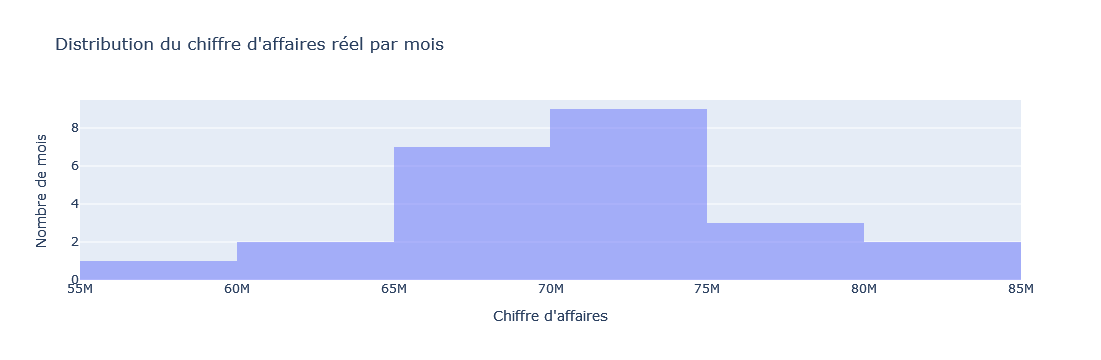

In [81]:
# Créer une trace pour l'histogramme
trace_hist = go.Histogram(x=chiffre_affaires_comparaison['Chiffre d\'affaires réel'], 
                          name='Chiffre d\'affaires réel', 
                          opacity=0.5)

# Créer la figure
fig_hist = go.Figure(data=[trace_hist], 
                     layout=go.Layout(title='Distribution du chiffre d\'affaires réel par mois', 
                                      xaxis=dict(title='Chiffre d\'affaires'), 
                                      yaxis=dict(title='Nombre de mois')))

# Afficher le graphique
fig_hist.show()

In [102]:
# Exporter le code HTML/JavaScript du graphique Plotly
html_code3 = plot(fig_hist, output_type='div', include_plotlyjs='cdn')

# Afficher le code HTML/JavaScript
print(html_code3)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="394ef80f-97fe-4dec-94e1-66a135dd3b1c" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("394ef80f-97fe-4dec-94e1-66a135dd3b1c")) {                    Plotly.newPlot(                        "394ef80f-97fe-4dec-94e1-66a135dd3b1c",                        [{"name":"Chiffre d'affaires r\u00e9el","opacity":0.5,"x":[77116823.63,68630087.1,83966565.11,73768382.25,74456862.95,75452831.26,66568257.54,71458412.47,57698419.1,72078822.15,73348094.49,69397222.08,69682738.8,69335513.73,81240438.53999999,67863083.18,76879289.95,72152337.29,70781407.65,63719498.96,73383567.3,63710243.02,67930953.6,7

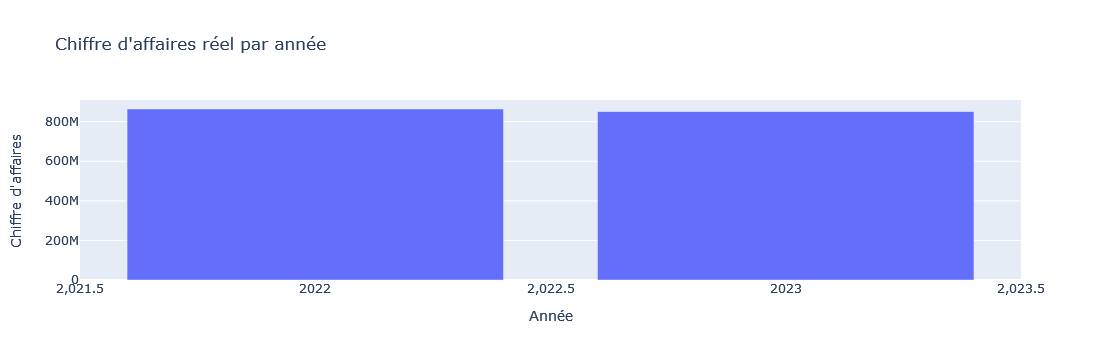

In [83]:
# Regrouper les données par année et calculer le chiffre d'affaires total pour chaque année
chiffre_affaires_par_annee = chiffre_affaires_comparaison.groupby('annee')['Chiffre d\'affaires réel'].sum()

# Créer une trace pour le diagramme en barres
trace_bar = go.Bar(x=chiffre_affaires_par_annee.index, 
                   y=chiffre_affaires_par_annee.values, 
                   name='Chiffre d\'affaires réel par année')

# Créer la figure
fig_bar = go.Figure(data=[trace_bar], 
                    layout=go.Layout(title='Chiffre d\'affaires réel par année', 
                                     xaxis=dict(title='Année'), 
                                     yaxis=dict(title='Chiffre d\'affaires')))

# Afficher le graphique
fig_bar.show()
